Importo las librerias NumPy (calculos de arrays) y Matplotlib (visualizción)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.show()

In [3]:
from numpy.linalg import norm as norm
def Linf(x):
    # esta funcion es la norma L-infinito
    return norm(x,np.inf)

In [4]:
def subA(A,tipo):
    # Esta funcion devuelve las matrices Lower, Diagonal y Upper (tipo= 1,2,3 respectivamente).
    dim = np.shape(A)
    n=dim[0]
    m=dim[1]
    res = np.zeros(dim)
    for i in  range(n):
        for j in range(m):
            if tipo==1:
                if i>j: res[i][j] = A[i][j]
            if tipo==2:
                if i==j: res[i][j] = A[i][j]
            if tipo==3:
                if i<j: res[i][j] = A[i][j]
    return np.array(res)

In [5]:
def jacobi(A,b,x0=None,n_iter=1000,tol=0.0001,verbose=False,density=5):
    # Esta funcion devuelve:
    # x   = matriz cuya i-sima columna es la i-esima iteracion de X por jacobi
    # err = vector cuyo i-esimo valor es el error relativo entre las iteraciones x[n] y x[n+1] 
    # n   = numero de iteraciones hasta detenerse el algoritmo
    
    A = np.array(A)
    b = np.array(b)
    nA,mA = np.shape(A)
    L=subA(A,1)
    D=subA(A,2)
    U=subA(A,3)
    if x0 == None:  x0=np.zeros(nA)
    x=[]
    x.append(np.array(x0))
    err=[10*tol]
    for n in range(n_iter):
        iteraciones=n
        xn = np.matmul( np.linalg.inv(D) , b - np.matmul( L+U  , x[n]) )
        x.append(np.array(xn))
        err.append( Linf( x[n+1] - x[n] ) / Linf(x[n])) 
        if verbose==True and np.remainder(n,density)==0:
            print("n      =",n)
            print("x["+str(n+1)+"]   =",xn)
            print("err["+str(n)+"] =",err[n])
            print(".....")
        if n>0 and err[n] < tol:break
    return x, err, iteraciones-1

Los datos del problema son:

In [6]:
RQ = float(0.2)
MICROORGANISMO_CRECIMIENTO = [
                                [RQ, 0.0, 1.0, 1.0, 0.0, 2.0] , 
                                [1.0, 3.0, -1.0, -1.0, -1.0, -6.0] , 
                                [-1.0, -1.0, 20.0, 0.0, 2.0, 1.0] , 
                                [-1.0, -1.0, 0.0, 8.0, 4.0, 0.0] ,
                                [0.0, 0.0, 2.0, 0.0, 7.0, 5.0]
                            ]

In [7]:
A=np.array(MICROORGANISMO_CRECIMIENTO)[:,:-1]
print(A)

[[ 0.2  0.   1.   1.   0. ]
 [ 1.   3.  -1.  -1.  -1. ]
 [-1.  -1.  20.   0.   2. ]
 [-1.  -1.   0.   8.   4. ]
 [ 0.   0.   2.   0.   7. ]]


In [8]:
b=np.array(MICROORGANISMO_CRECIMIENTO)[:,-1]
print(b)

[ 2. -6.  1.  0.  5.]


Llamo a la funcion de Jacobi, verbose=True hace que imprima las iteraciones

In [9]:
x, errJac, nJac = jacobi(A,b,verbose=True)

n      = 0
x[1]   = [10.         -2.          0.05        0.          0.71428571]
err[0] = 0.001
.....
n      = 5
x[6]   = [ 7.7873852  -5.40734617  0.32443375  0.50752875  0.65462536]
err[5] = 0.4658658954725204
.....
n      = 10
x[11]   = [ 7.36273679 -3.82159163  0.07244439 -0.10264982  0.64688338]
err[10] = 0.34333653766159067
.....
n      = 15
x[16]   = [ 9.69032565 -4.64377026  0.22018066  0.25830071  0.68605639]
err[15] = 0.2993657041269559
.....
n      = 20
x[21]   = [ 7.33916413 -4.54888636  0.18574829  0.17134401  0.6467802 ]
err[20] = 0.06367466197196993
.....
n      = 25
x[26]   = [ 8.74645737 -4.2335178   0.14827699  0.08292074  0.67014051]
err[25] = 0.06647673239263546
.....
n      = 30
x[31]   = [ 8.39370071 -4.63032552  0.20725988  0.22502152  0.66441177]
err[30] = 0.10158646883019505
.....
n      = 35
x[36]   = [ 8.06411235 -4.35323047  0.16126445  0.11326345  0.6588007 ]
err[35] = 0.07192792988930069
.....
n      = 40
x[41]   = [ 8.6084118  -4.45648608  0.181922    0.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


In [10]:
resJacobi=x[-1]

In [11]:
def GaussSeidel(A,b,x0=None,n_iter=100,tol=0.0001,verbose=False,density=5):
    # Esta funcion devuelve:
    # x   = matriz cuya i-sima columna es la i-esima iteracion de X por jacobi
    # err = vector cuyo i-esimo valor es el error relativo entre las iteraciones x[n] y x[n+1] 
    # n   = numero de iteraciones hasta detenerse el algoritmo
    
    A = np.array(A)
    b = np.array(b)
    nA,mA = np.shape(A)
    L=subA(A,1)
    D=subA(A,2)
    U=subA(A,3)
    if x0 == None:  x0=np.zeros(nA)
    x=[]
    x.append(np.array(x0))
    err=[10*tol]
    for n in range(n_iter):
        iteraciones=n
        xnmas1=np.zeros(mA)
        for i in range(mA):
            xnmas1[i] =  np.linalg.inv(D)[i,i] * ( b[i] - np.matmul( L  , xnmas1)[i] - np.matmul( U , x[n])[i] )
        x.append(np.array(xnmas1))
        err.append( Linf( x[n+1] - x[n] ) / Linf(x[n])) 
        if verbose==True and np.remainder(n,density)==0:
            print("n      =",n)
            print("x["+str(n+1)+"]   =",xnmas1)
            print("err["+str(n)+"] =",err[n])
            print(".....")
        if n>0 and err[n] < tol:break
    return x, err, iteraciones-1

In [12]:
x, errGS, nGS = GaussSeidel(A,b,verbose=True,density=2)

n      = 0
x[1]   = [10.         -5.33333333  0.28333333  0.58333333  0.63333333]
err[0] = 0.001
.....
n      = 2
x[3]   = [ 9.65694444 -4.96759259  0.21591204  0.2433912   0.65259656]
err[2] = 0.4333333333333334
.....
n      = 4
x[5]   = [ 8.63978669 -4.56639609  0.18681395  0.17489594  0.6609103 ]
err[4] = 0.20228558416031467
.....
n      = 6
x[7]   = [ 8.40612053 -4.47425783  0.18013602  0.15919726  0.66281828]
err[6] = 0.051892040264358744
.....
n      = 8
x[9]   = [ 8.35254938 -4.45313389  0.17860502  0.15559815  0.66325571]
err[8] = 0.012227632898088354
.....
n      = 10
x[11]   = [ 8.34026752 -4.44829097  0.17825401  0.15477301  0.663356  ]
err[10] = 0.0028213188831185294
.....
n      = 12
x[13]   = [ 8.33745175 -4.44718066  0.17817354  0.15458383  0.66337899]
err[12] = 0.0006477754238934686
.....
n      = 14
x[15]   = [ 8.3368062  -4.44692611  0.17815509  0.15454046  0.66338426]
err[14] = 0.00014856083633768194
.....


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


In [13]:
resGaussSeidel = x[-1]

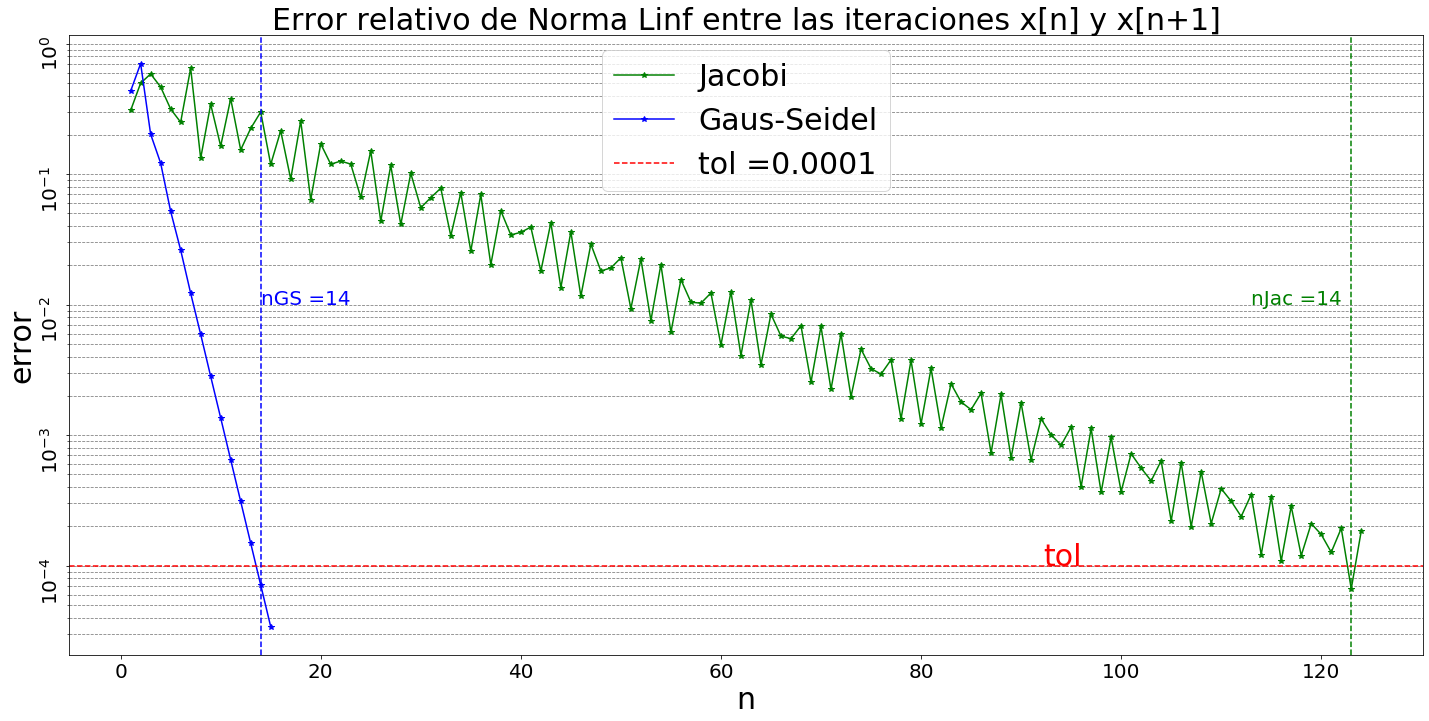

In [14]:
tol=0.0001
error_plot=plt.figure(figsize=(20,10))
ax = error_plot.add_subplot(111)
ax.plot(errJac[1:],label="Jac",marker='*',c='g')
ax.plot(errGS[1:],label="GS",marker='*',c='b')
# escala LOG y grid
plt.yscale('log')
ax.yaxis.grid(color='gray', linestyle='dashed',which='both')
#linea horizontal de la tolerancia
ax.axhline(tol,c='r',linestyle='--',label='tol')
plt.text(max(nGS,nJac)*3/4,tol,'tol',fontsize=30,c='r')
#lineas verticales de los n's de corte
ax.axvline(nGS,c='b',linestyle='--')
plt.text(nGS,100*tol,'nGS ='+str(nGS),fontsize=20,c='b')
ax.axvline(nJac,c='g',linestyle='--')
plt.text(nJac-10,100*tol,'nJac ='+str(nGS),fontsize=20,c='g')
# Legend
handles, _ = ax.get_legend_handles_labels()
labels=["Jacobi","Gaus-Seidel","tol ="+str(tol)]
ax.legend(handles,labels,fontsize=30)
# Titulos de Grafico y ejes
plt.title('Error relativo de Norma Linf entre las iteraciones x[n] y x[n+1]',fontsize=30)
plt.ylabel(ylabel='error',fontsize=30)
plt.xlabel(xlabel='n',fontsize=30)
plt.tight_layout()

# ticks
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
    tick.label.set_rotation('vertical')
    
    
# guardo el grafico
plt.savefig('Jacobi vs GS')

Comparo ambas soluciones

In [15]:
print(Linf(resJacobi-resGaussSeidel)/Linf(resJacobi))

7.091229408617875e-05
